<a href="https://colab.research.google.com/github/sebasruggero/TextAnalytics/blob/main/Bullrich_SpeechToText_Statics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Border Data


## Lic. Sebastian Ruggero
#### Tema de Análisis: Speech to Text and Text Analytics




<h1>Este trabajo tiene como objetivo aplicar tecnicas de analisis estadisticos para realizar Text Analytics</h1>

### [Text Mining Infrastructure in R](https://www.researchgate.net/publication/26539008_Text_Mining_Infrastructure_in_R)

### [Using Text Mining Techniques for Extracting Information from Research Articles](https://www.researchgate.net/publication/321150349_Using_Text_Mining_Techniques_for_Extracting_Information_from_Research_Articles)

### [Text Mining: Approaches and Applications](https://www.researchgate.net/publication/265568331_Text_Mining_Approaches_and_Applications)

### [Text as Data](https://web.stanford.edu/~gentzkow/research/text-as-data.pdf)

Fuente de analisis : [Video - Entrevista realizada por Esteban Trebuc a Patricia Bullrich - 10 jul 2023  ](https://web.stanford.edu/~gentzkow/research/text-as-data.pdf)


<h3>El algoritmo incluye los siguietes pasos:</h3>

### Preparacion del entorno para realizar el analisis utilizando lenguaje R

 1. Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)

 2. Instalacion y carga de librerias restantes

 3. Conversion de audio a texto mediante el uso de la API

4. Carga de datos

5. Sentimientos: Analisis y Visualización

6. Limpieza de texto

  6.1 Conversión de texto a minusculas

  6.2  Eliminar palabras vacías

7. Nube de Palabras

8. Frecuencia de Palabras

9. Biagramas: Analisis y Visualizacion






 1. Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)



In [4]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg
!pip install webvtt-py

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-5umetttm
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-5umetttm
  Resolved https://github.com/openai/whisper.git to commit e8622f9afc4eba139bf796c210f5c01081000472
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=798395 sha256=e93acd078a79f6915ddf2f72157eb220d6c943eec52de76189dec83a3f109ca6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4c0zfeiv/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu220

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 2. Instalacion y carga de librerias restantes


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import webvtt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
nltk.download('all')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

 3. Conversion de audio a texto mediante el uso de la API


In [7]:
!whisper "/content/drive/Othercomputers/My Laptop/DataScience/SpeechToText/bullrich.mp3" --model small

100%|████████████████████████████████████████| 461M/461M [00:03<00:00, 133MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: Spanish
[00:00.000 --> 00:06.740]  Un gusto, gracias. Sí, candidata, pre-candidata Presidente de El Frente, juntos por el cambio.
[00:06.740 --> 00:09.420]  ¿Tan lijo de la gente, Patricio, o no?
[00:09.420 --> 00:13.500]  Yo trato de estar todos los días lo más cerca posible.
[00:13.500 --> 00:16.500]  Hoy estuve en Vicente López, en 3 de febrero.
[00:16.500 --> 00:21.500]  El fin de semana estuve en Junín, estuve en Pergamino, estuve en Zárate.
[00:21.500 --> 00:25.500]  Zárate debe ser así.
[00:25.500 --> 00:27.800]  Cada un minuto y medio hay un robo.
[00:27.800 --> 00:30.300]  Terrible. Terrible c

4. Carga de datos desde el drive

In [8]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/bullrich.vtt')  # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Crear una lista de diccionarios para almacenar los datos de los subtítulos
data = []
for subtitulo in subtitulos:
    data.append({'time': subtitulo.start, 'subtitulo': subtitulo.text})

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar DataFrame
print(df)

             time                                          subtitulo
0    00:00:00.000  Un gusto, gracias. Sí, candidata, pre-candidat...
1    00:00:06.740             ¿Tan lijo de la gente, Patricio, o no?
2    00:00:09.420  Yo trato de estar todos los días lo más cerca ...
3    00:00:13.500      Hoy estuve en Vicente López, en 3 de febrero.
4    00:00:16.500  El fin de semana estuve en Junín, estuve en Pe...
..            ...                                                ...
885  00:33:02.800                              gracias por tu tiempo
886  00:33:04.800           Patricia Bulli, si, candidata presidente
887  00:33:06.800  pre-candidata presidente por juntos por el cambio
888  00:33:08.800  gracias Patricia Bulli, con un montón de defin...
889  00:33:10.800                                ya lo vamos a hacer

[890 rows x 2 columns]


In [17]:
df ['start_date'] = pd.to_datetime (df.time)

5. Sentimientos: Analisis y Visualización


In [18]:
# Cargamos las librerias
from nltk.sentiment import SentimentIntensityAnalyzer

In [19]:
sia = SentimentIntensityAnalyzer()
df['Puntaje_sentimiento'] = df['subtitulo'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [22]:
import pandas as pd
import plotly.express as px


# Define una función para asignar colores según el tipo de sentimiento
def assign_color(puntaje):
    if puntaje > 0:
        return 'verde'  # Positivo - verde
    elif puntaje < 0:
        return 'rojo'  # Negativo - rojo
    else:
        return 'amarillo'  # Neutro - amarillo

# Agrega una nueva columna al DataFrame con el color según el tipo de sentimiento
df['Color_sentimiento'] = df['Puntaje_sentimiento'].apply(assign_color)

# Crea el gráfico de dispersión
fig = px.scatter(df, x='time', y='Puntaje_sentimiento', color='Color_sentimiento', text=None,
                 title='Análisis de Sentimiento a lo largo del tiempo')

# Ajusta el rango del eje x
fig.update_xaxes(range=[0, df['time'].max()])

# Formatea el eje x para mostrar el formato MM:SS
fig.update_layout(xaxis_tickformat='%M:%S')

# Personaliza la apariencia del gráfico
fig.update_traces(textposition='top center')

# Muestra el gráfico
fig.show()

In [24]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/bullrich.vtt')   # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Obtener texto plano sin los tiempos de los subtítulos
texto_plano = '\n'.join(subtitulo.text for subtitulo in subtitulos)

# Mostrar texto plano
print(texto_plano)

Un gusto, gracias. Sí, candidata, pre-candidata Presidente de El Frente, juntos por el cambio.
¿Tan lijo de la gente, Patricio, o no?
Yo trato de estar todos los días lo más cerca posible.
Hoy estuve en Vicente López, en 3 de febrero.
El fin de semana estuve en Junín, estuve en Pergamino, estuve en Zárate.
Zárate debe ser así.
Cada un minuto y medio hay un robo.
Terrible. Terrible como está Zárate.
La gente llora. La desesperación. Se toman un uber por dos cuadras.
Una situación impresionante. Junín, explotado con el delito.
Es decir, dicen que en una ciudad como Junín, en una ciudad como Zárate,
tienen 3 o 4 autos de policía. No existe.
Es decir, no hay ninguna política de protección a la gente.
Así que yo camino todo el tiempo y todo el tiempo sé lo que le está pasando a cada ciudad en Argentina.
Y además, te lo dicen con la angustia.
Hay una angustia en la Argentina profunda.
Que no es solo material. Es una angustia de la existencia del país.
¿Cómo salimos de una situación de crisis

6. Limpieza de texto

  6.1 Conversión de texto a minusculas

  6.2  Eliminar palabras vacías



In [40]:
# Pasamos el texto a minusculas
texto_minusculas = texto_plano.lower()

# Definimos las stopwords en el idioma correspondiente
stopwords_es = set(stopwords.words('spanish'))

# Eliminar palabras vacías
stopwords_es = stopwords.words('spanish')
palabras_a_eliminar = [",", "que", "y", "otras", "otras", "¿", "?", ".", "...", "si","vos", "entonces", "va", "ver", "digamos", "claro","tener","tenés"]

# Tokenización del texto
palabras = nltk.word_tokenize(texto_minusculas)

# Eliminacion de stopwords
texto_sin_stopwords = [palabra for palabra in palabras if palabra.lower() not in stopwords_es and palabra not in palabras_a_eliminar]



In [41]:
texto_procesado = ' '. join(texto_sin_stopwords)

In [42]:
texto_procesado

'gusto gracias candidata pre-candidata presidente frente juntos cambio ¿tan lijo gente patricio trato días cerca posible hoy vicente lópez 3 febrero fin semana junín pergamino zárate zárate debe ser así cada minuto medio robo terrible terrible zárate gente llora desesperación toman uber dos cuadras situación impresionante junín explotado delito decir dicen ciudad junín ciudad zárate 3 4 autos policía existe decir ninguna política protección gente así camino tiempo tiempo sé pasando cada ciudad argentina además dicen angustia angustia argentina profunda solo material angustia existencia país ¿cómo salimos situación crisis tan profunda escucho presidente decir hicimos hicimos siento lejanía gente llora llora literalmente tristeza angustia tan profunda país tan profundo cambio hacer ahora patricia ustedes pelean ¿pueden favorecer gobierno hechos demostran hecho ¿y ustedes siguen peleando manera peleamos discutiendo cómo sale argentina experiencia gobierno experiencia gobierno cuatro años 

7. Nube de Palabras



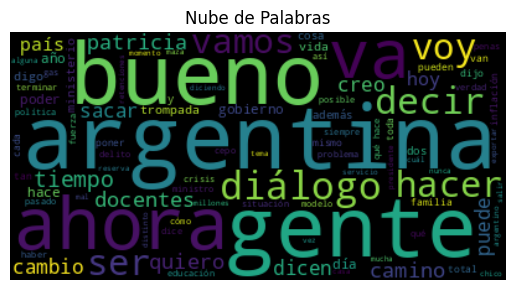

In [49]:
wordcloud = WordCloud().generate(texto_procesado)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

In [44]:
# Tokenización de palabras

from nltk.tokenize import word_tokenize
from nltk.text import Text

text = texto_procesado
tokens = word_tokenize(text.lower())

# Creación del objeto Text de NLTK
text_obj = Text(tokens)

# Análisis de concordancia
term = "Argentina"
concordance = text_obj.concordance_list(term, width=50)

# Imprimir concordancia
for entry in concordance:
    print(entry.line)
    print('')

pasando cada ciudad argentina además dicen angust

n angustia angustia argentina profunda solo mater

scutiendo cómo sale argentina experiencia gobiern

icas públicas éxito argentina dicen planes social

entira puedes decir argentina años tales tales pl

no próximos 10 años argentina país cumplir 190 18

 30.000 8.000 fondo argentina nunca puede enfrent

tenciones bueno hoy argentina perdiendo crecer ur

ma producción bueno argentina exportar exportar e

 quedándote anclado argentina hoy modo prácticame

os trompadas gritos argentina problemas hace 40 a

be ahora concepción argentina mal diálogo verdad 

 mal diálogo verdad argentina diálogos ejemplo ca

m significó después argentina bien argentina mal 

pués argentina bien argentina mal camino nítido c

cen diálogo sometas argentina sigue igual digo di

n vamos poner orden argentina vez todas diálogo s

cambio verdad fondo argentina puede seguir vivien

 alvarias mira creo argentina dialogar base progr

 nación voy cambiar argentina t

9. Biagramas: Analisis y Visualizacion


In [45]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Tokenización de palabras
text = texto_procesado

tokens = word_tokenize(text.lower())

# Creación de bigramas (pares de palabras)
bigrams = list(ngrams(tokens, 2))

# Conteo de co-ocurrencia de bigramas
co_ocurrence_counts = Counter(bigrams)

# Imprimir los bigramas más frecuentes
for bigram, count in co_ocurrence_counts.most_common(10):
    print(bigram, count)


('planes', 'sociales') 5
('¿qué', 'haces') 5
('patricia', 'bullrich') 4
('cada', 'vez') 4
('trompadas', 'recibe') 4
('tiempo', 'tiempo') 3
('voy', 'ser') 3
('8', '10') 3
('100', '%') 3
('vamos', 'poner') 3


In [35]:
import plotly.express as px
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Tu código para tokenización y conteo de bigramas aquí

# Crear un DataFrame a partir del contador de co-ocurrencia
data = {'Bigram': [' '.join(bigram) for bigram, _ in co_ocurrence_counts.most_common(10)],
        'Count': [count for _, count in co_ocurrence_counts.most_common(10)]}

df = pd.DataFrame(data)

# Graficar el diagrama de bigramas
fig = px.bar(df, x='Bigram', y='Count', title='Diagrama de Bigramas más Frecuentes')
fig.show()